##### Imports

In [17]:
import preprocess
import sample
import nn
import cluster
%matplotlib widget
%reload_ext autoreload
%autoreload 2


##### Read Data

In [18]:
classify = True
if classify:
    file = 'iris.csv'
    index_col, header = 0, 0
else:
    file = 'examen.csv'
    index_col, header = None, None

data, N_S, axes_names, indices = preprocess.get_data(file, header, index_col)
X_S, Y_S, revert_X, revert_Y = preprocess.preprocess(data, classify)

##### Sample

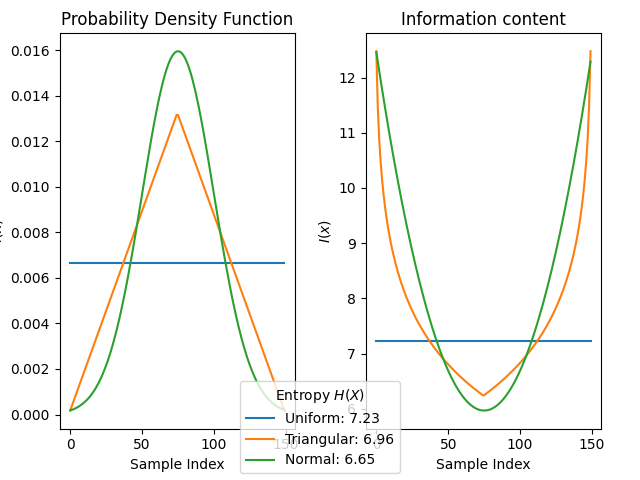

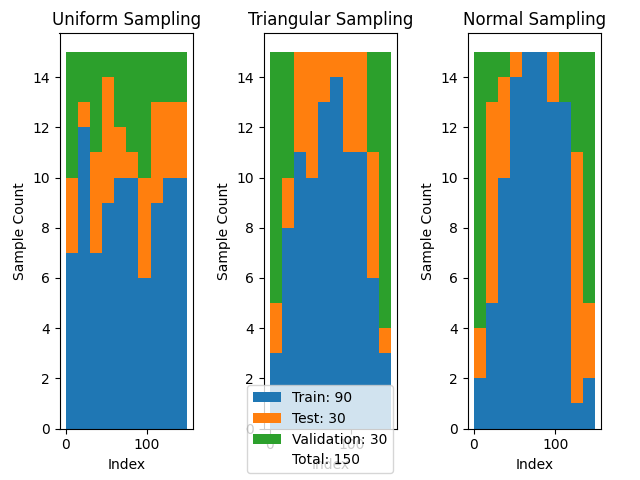

In [21]:
sample.compare_PDF(data.index)
partition = sample.compare_sample(indices)

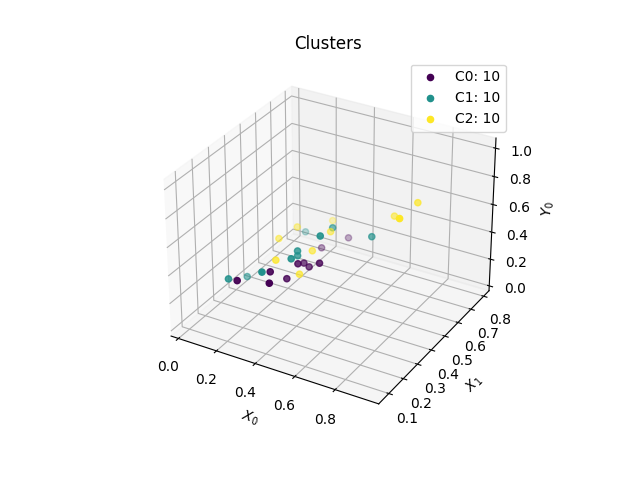

In [20]:

W, B = nn.train({k : (X_S[:, v], Y_S[:, v]) for k, v in partition.items()},
    "Train", [2, 2], 1000)
Y, E = nn.feedforward(X_S[:, partition["Test"]], W, B)

cluster.plot(X_S[:, partition["Test"]], Y)
